<a href="https://colab.research.google.com/github/KevOdhiambo/Unsupervised-Learning-With-R/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Analysis Objectives
Perform anomaly detection analysis on sales data and report any inconsistencies.

### Understanding context
Carrefour Kenya seeks to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Anomaly detection analysis on sales data would be helpful in identifying if there is occurrence of any fraudulent transactions and when they occured to perform further investigation. 

### Experimental Design

- Problem definition
- Data Loading
- Exploratory data analysis
- Implementation of the solution
- Summary of findings

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#INstall REquired pacakages
install.packages('lubridate')
install.packages('tidyverse')
install.packages('tibbletime')
install.packages('anomalize')

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpmy8cK3/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpmy8cK3/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmpmy8cK3/downloaded_packages’

(as ‘lib’ is unspecified)



























































































































































































































	‘/tmp/Rtmpmy8cK3/downloaded_packages’



In [3]:
%%R
#Load te packages
library(tidyverse)
library(anomalize)
library(tibbletime)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Attaching package: ‘tibbletime’



    filter


Attaching package: ‘lubridate’



    date, intersect, setdiff, union




In [4]:
%%R
# Load data
sales <- read.csv('SalesForecast.csv', stringsAsFactors = FALSE)


In [7]:
%%R
#Preview data
head(sales, 10)

        Date    Sales
1   1/5/2019 548.9715
2   3/8/2019  80.2200
3   3/3/2019 340.5255
4  1/27/2019 489.0480
5   2/8/2019 634.3785
6  3/25/2019 627.6165
7  2/25/2019 433.6920
8  2/24/2019 772.3800
9  1/10/2019  76.1460
10 2/20/2019 172.7460


In [8]:
%%R
#get summary stats of our dataset
summary(sales$Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.68  124.42  253.85  322.97  471.35 1042.65 


In [9]:
%%R
# Convert date column into date object
sales$Date <- as_date(mdy(sales$Date))
head(sales)

        Date    Sales
1 2019-01-05 548.9715
2 2019-03-08  80.2200
3 2019-03-03 340.5255
4 2019-01-27 489.0480
5 2019-02-08 634.3785
6 2019-03-25 627.6165


In [10]:
%%R
# Get the range of dates in the data
paste(c('Start date :'), min(sales$Date))
paste(c('End date :'), max(sales$Date))

#Sales data ranges over a period of 3 months

[1] "End date : 2019-03-30"


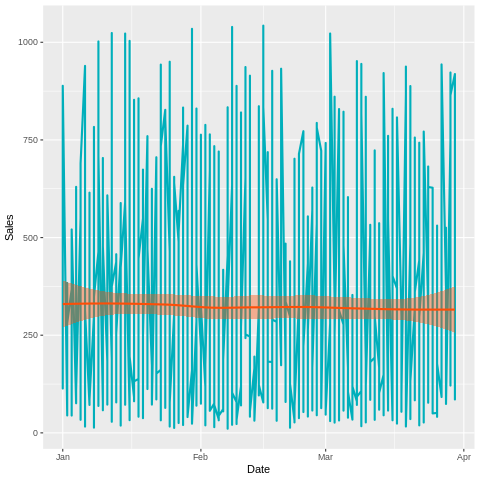

In [11]:
%%R
# Visualize sales data
ggplot(data = sales, aes(x=Date, y = Sales))+
  geom_line(color = "#00AFBB", size = 1)+
  stat_smooth(color = "#FC4E07", fill = "#FC4E07",
  method = "loess")

  #Trend line shows that sales were pretty constant through the three months

In [12]:
%%R
# Get total sales and average sales made per day
sale_summary <- sales %>% group_by(Date) %>% summarise_all(list(mean = mean, sum = sum))
head(sale_summary,  3)

# A tibble: 3 × 3
  Date        mean   sum
  <date>     <dbl> <dbl>
1 2019-01-01  395. 4745.
2 2019-01-02  243. 1946.
3 2019-01-03  260. 2078.




  method            from
  as.zoo.data.frame zoo 



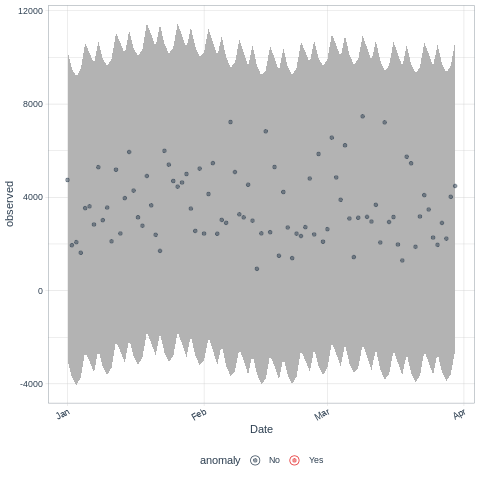

In [13]:
%%R
# Anomaly detection using total sales per day
sale_summary %>% as_tbl_time(Date) %>% time_decompose(sum) %>% anomalize(remainder) %>% time_recompose()%>%plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)


#No anomalies detected.

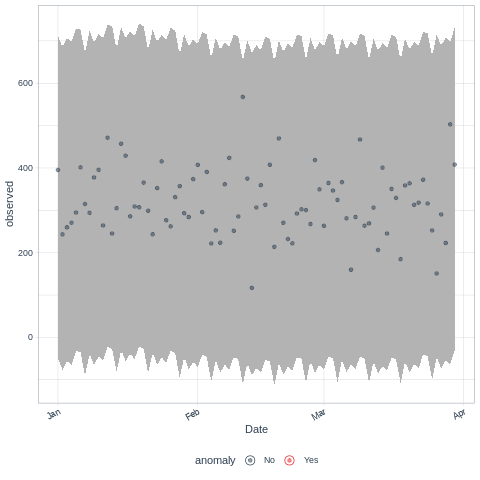

In [14]:
%%R
# Anomaly detection using average sales per day
sale_summary %>% as_tbl_time(Date) %>% time_decompose(mean) %>% anomalize(remainder) %>% time_recompose()%>%plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

#No anomalies detected.

## Summary of Findings.

No evidence of fraudulent transactions was found after performing of the anomaly detection analysis.